# **Supervised Learning**

## Metaverse Financial Transactions

<img src="../images/ia.jpg" alt="Inteligência Artificial">

## **Introduction**

### **About Dataset**

The Metaverse Financial Transactions Dataset offers a comprehensive collection of blockchain-based financial activities within the Open Metaverse. With 78,600 transactions, it provides detailed attributes like timestamps, addresses, transaction types, and risk scores. This dataset supports research in fraud detection, risk assessment, and user behavior analysis in virtual environments. It's curated to reflect the complexity of blockchain activities, aiding the development of secure digital asset management. 

### **About the Problem**

The objective of this project is to develop predictive models for anomaly detection, fraud analysis, and risk assessment in financial transactions within the Metaverse. This constitutes a multivariate classification problem, where the aim is to categorize transactions into different risk levels based on attributes such as transaction type, user behavior, and transaction amount. The target variable is the risk level, which can be categorized as high risk, moderate risk, or low risk.

### **About the Solution**

 ### Data Understanding and Preprocessing
------------------------------------

#### Data Exploration

The dataset consists of 78,600 records, each representing a metaverse transaction. The attributes include:

-   Timestamp: Date and time of the transaction
-   Hour of Day: Hour part of the transaction timestamp
-   Sending Address: Blockchain address of the sender
-   Receiving Address: Blockchain address of the receiver
-   Amount: Transaction amount in a simulated currency
-   Transaction Type: Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing)
-   Location Region: Simulated geographical region of the transaction
-   IP Prefix: Simulated IP address prefix for the transaction
-   Login Frequency: Frequency of login sessions by the user, varying by age group
-   Session Duration: Duration of activity sessions in minutes
-   Purchase Pattern: Behavioral pattern of purchases (e.g., focused, random, high-value)
-   Age Group: Categorization of users into new, established, and veteran based on their activity history
-   Risk Score: Calculated risk score based on transaction characteristics and user behavior
-   Anomaly: Risk level assessment (e.g., high_risk, moderate_risk, low_risk)

#### Data Cleaning

1.  Missing Values: Identify and handle missing values through imputation/ removal, ensuring data integrity.
2.  Data Formatting: Convert categorical variables into numerical formats using techniques like one-hot encoding.
3.  Normalization: Normalize continuous variables to standardize the scale and improve model performance.

#### Feature Engineering

1.  Time-Based Features: Extract additional features from the timestamp, such as day of the week, month, or part of the day.
2.  Behavioral Features: Create aggregate features that summarize user behaviors, such as average transaction amount or total login duration.
3.  Risk Indicators: Develop custom risk indicators based on the combination of different attributes, enhancing the model's ability to detect anomalies.

### Model Development
-----------------

#### Algorithm Selection

Several machine learning algorithms will be evaluated for their effectiveness in anomaly detection:

1.  Isolation Forest: Effective in identifying outliers by isolating observations.
2.  Autoencoders: Neural network-based models that learn to reconstruct input data and identify anomalies as deviations.
3.  Local Outlier Factor (LOF): Detects anomalies by comparing the local density of a point to that of its neighbors.
4.  Random Forest: Ensemble method that can be adapted for anomaly detection by treating outliers as a separate class.

#### Model Training

1.  Data Splitting: Splitting the dataset into training and test sets to ensure robust model evaluation.
2.  Hyperparameter Tuning: Use grid search/random search to optimize model parameters.
3.  Cross-Validation: Implement k-fold cross-validation to validate model performance and prevent overfitting.

#### Model Evaluation

1.  Performance Metrics: Evaluate models using metrics such as precision, recall, F1-score, and area under the receiver operating characteristic (ROC) curve.
2.  Threshold Selection: Determine the optimal threshold for classifying transactions as anomalies based on the trade-off between precision and recall.

---

This project was made by:

| Name | UP |
|-|-|
| Ana Carolina Coutinho | up202108685 |
| José Costa | upxxxx |
| Afonso Poças | upxxxx |


### Library Installation

Before proceeding, make sure you have the necessary libraries installed for this project. 
Open your terminal and navigate to the project's root directory. Then, run the following command:

```bash
pip install -r requirements.txt
```


Firstly, we import the necessary libraries, packages and methods.

In [436]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
from imblearn.under_sampling import AllKNN
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')


### Create a dataframe with the dataset from the csv file

In [437]:
df = pd.read_csv('../data/metaverse_transactions_dataset.csv')

df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [438]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " cols in the dataset")

There are 78600 rows and 14 cols in the dataset


# Data preprocessing

### Pre analysis

This should be done before any data manipulation, to get a better understanding of the data and filter out any outliers.

In [439]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [440]:
df.dtypes

timestamp             object
hour_of_day            int64
sending_address       object
receiving_address     object
amount               float64
transaction_type      object
location_region       object
ip_prefix            float64
login_frequency        int64
session_duration       int64
purchase_pattern      object
age_group             object
risk_score           float64
anomaly               object
dtype: object

In [441]:
# check missing values
df.isna().any()

timestamp            False
hour_of_day          False
sending_address      False
receiving_address    False
amount               False
transaction_type     False
location_region      False
ip_prefix            False
login_frequency      False
session_duration     False
purchase_pattern     False
age_group            False
risk_score           False
anomaly              False
dtype: bool

### Filtering out outliers

In our analysis, we filtered outliers, particularly in transaction amounts and session durations, to remove extreme values that could skew our predictive models. This ensures our analysis is based on representative data, enhancing the accuracy and reliability of anomaly detection.

In [442]:
#df.drop(['sending_address', 'receiving_address', 'timestamp', 'ip_prefix', 'purchase_pattern'], axis=1, inplace=True)

#df.shape

In [443]:
# converte valores categóricos em valores numéricos
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   timestamp  hour_of_day  sending_address  receiving_address      amount  \
0      21675           12              700                276  796.949206   
1      35368           19              960                369    0.010000   
2       3832           16              227                375  778.197390   
3      35500            9              664                629  300.838358   
4      10533           14              771                508  775.569344   

   transaction_type  location_region  ip_prefix  login_frequency  \
0                 4                2    192.000                3   
1                 1                4    172.000                5   
2                 1                1    192.168                3   
3                 4                4    172.000                8   
4                 2                0    172.160                6   

   session_duration  purchase_pattern  age_group  risk_score  anomaly  
0                48                 0          0       1

## Data Analysis

We will now perform data analysis to gain a better understanding of our dataset.

In [444]:
print("Nomes das colunas no DataFrame:", df.columns.tolist())


Nomes das colunas no DataFrame: ['timestamp', 'hour_of_day', 'sending_address', 'receiving_address', 'amount', 'transaction_type', 'location_region', 'ip_prefix', 'login_frequency', 'session_duration', 'purchase_pattern', 'age_group', 'risk_score', 'anomaly']


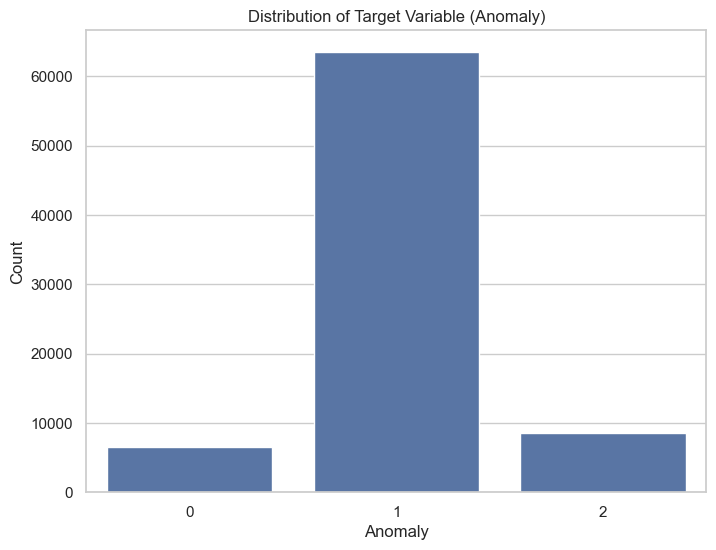

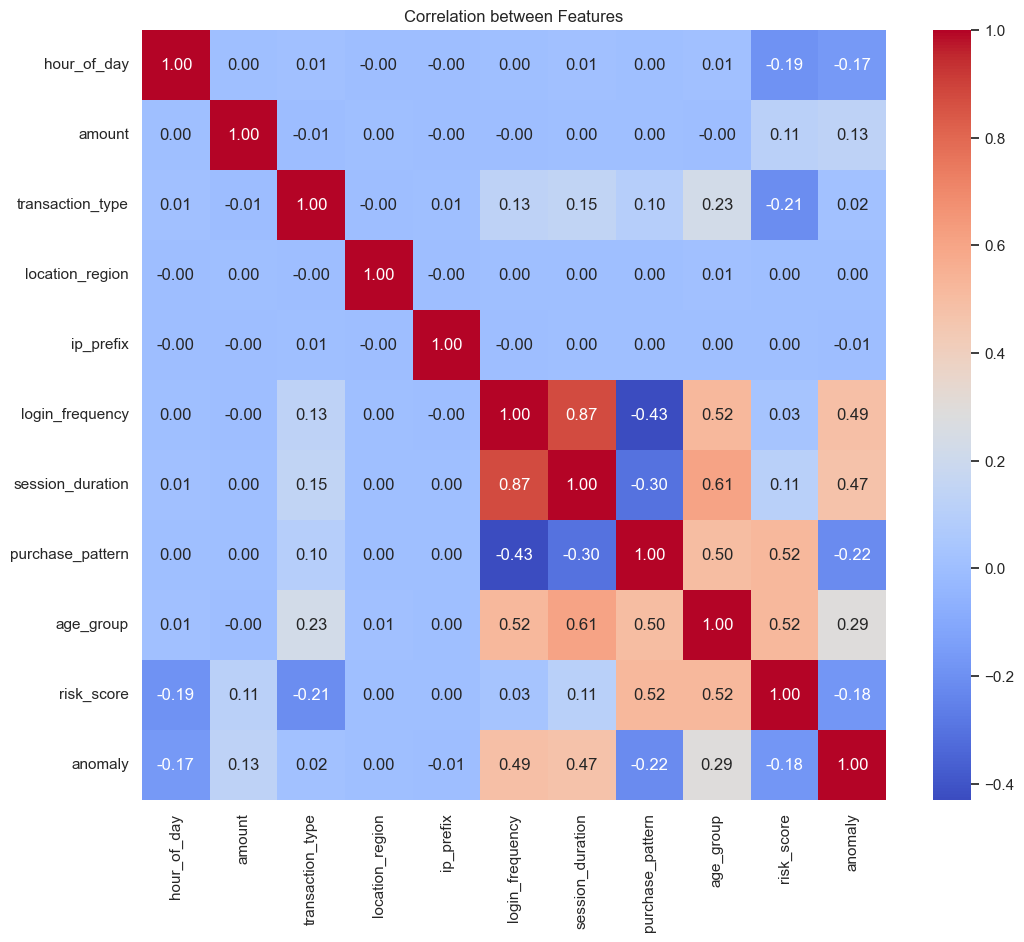

In [445]:
import seaborn as sns
# O primeiro gráfico mostra a contagem de ocorrências de cada classe da variável alvo ("anomaly")
plt.figure(figsize=(8, 6))
sns.countplot(x='anomaly', data=df)
plt.title('Distribution of Target Variable (Anomaly)')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

df_corr = df.drop(columns=['timestamp', 'sending_address', 'receiving_address'])

# O mapa de calor mostra a correlação entre as features
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features')
plt.show()


<Axes: >

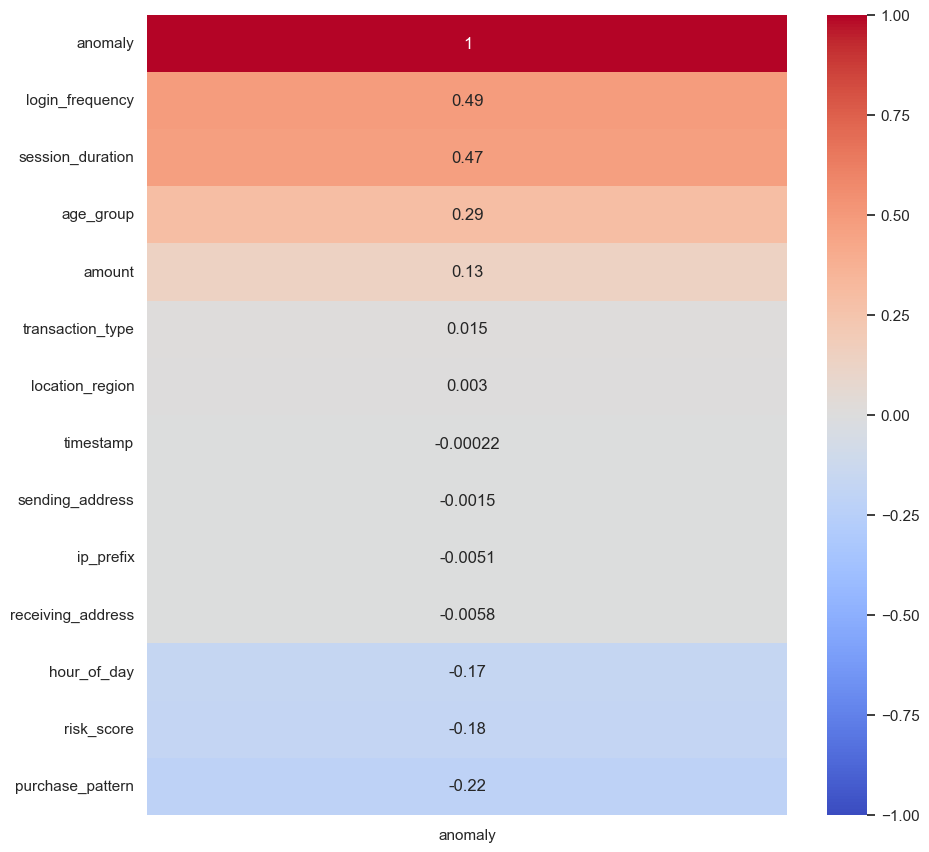

In [446]:
cols = list(df1.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['anomaly']].sort_values(by='anomaly', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

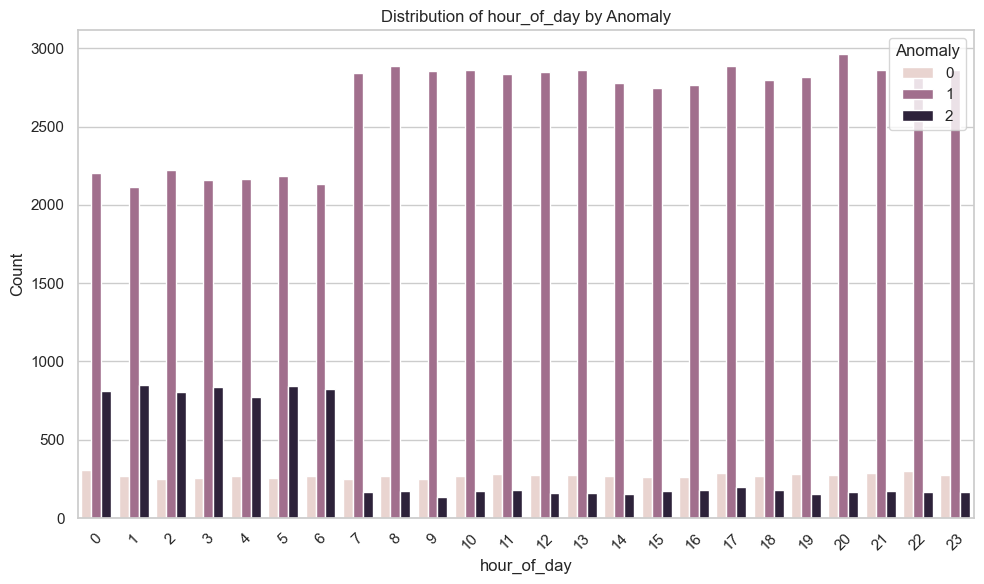

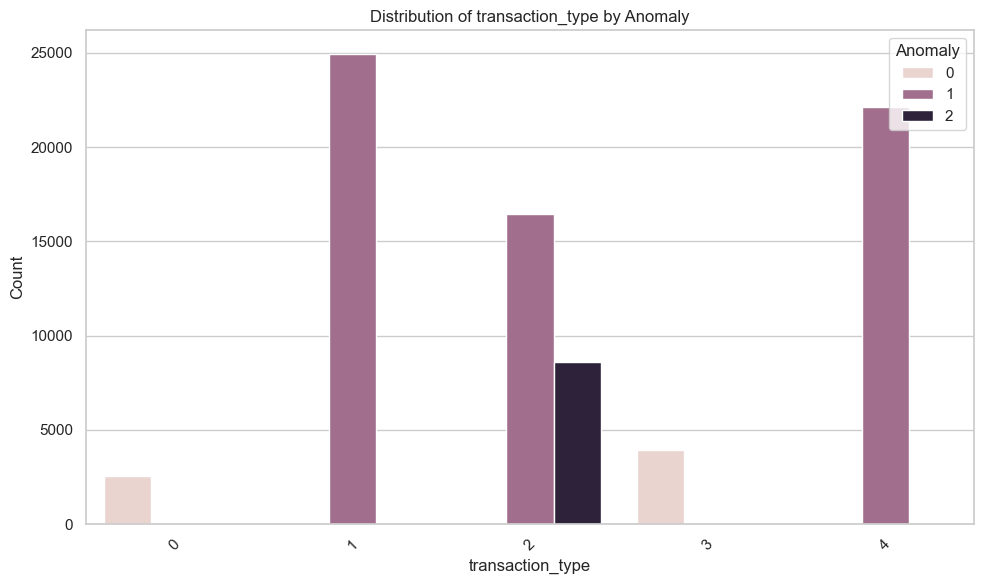

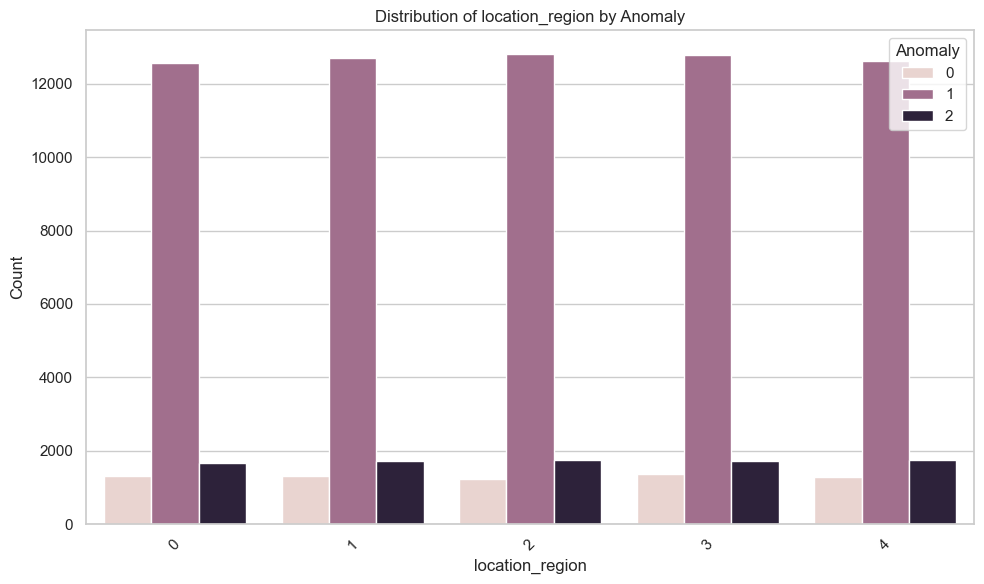

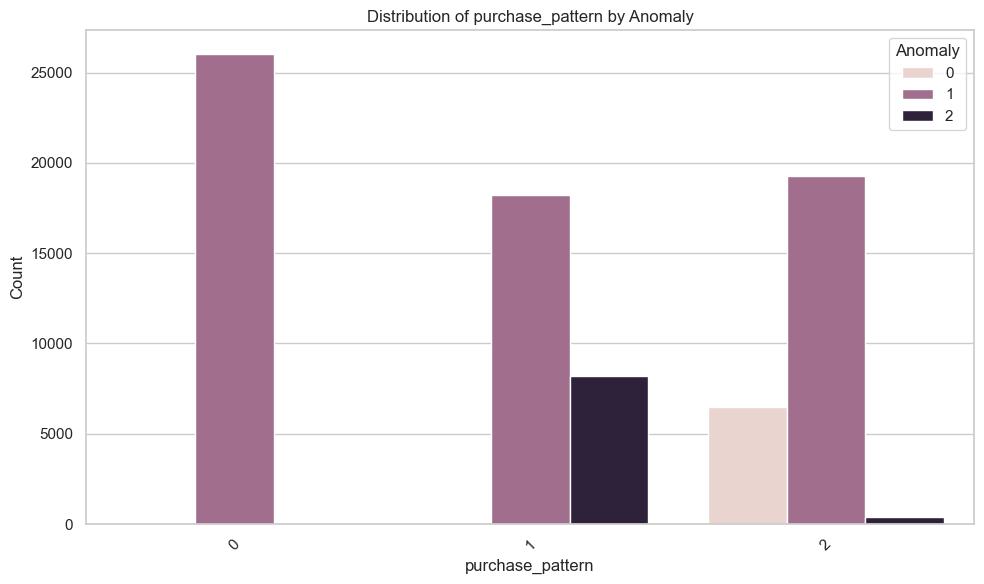

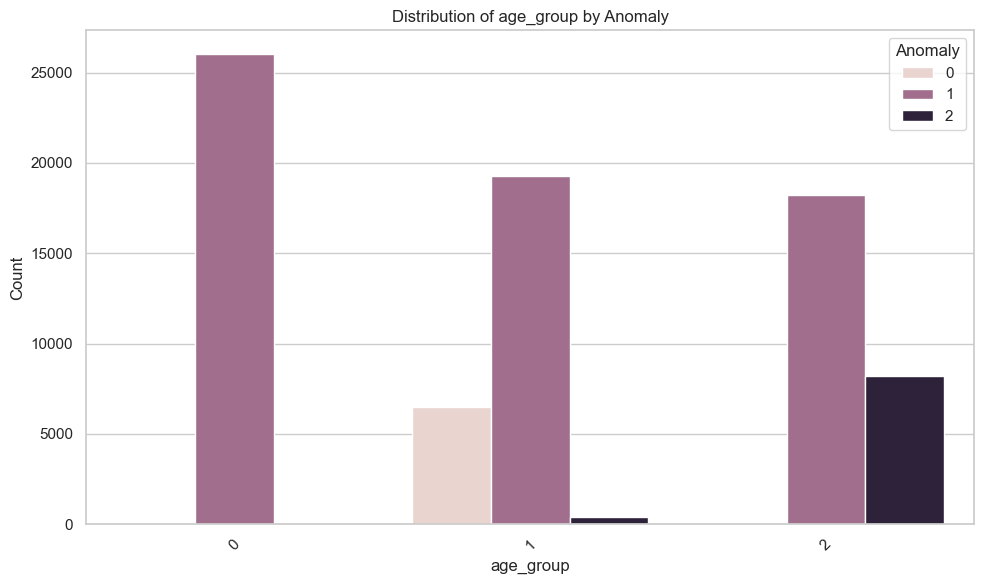

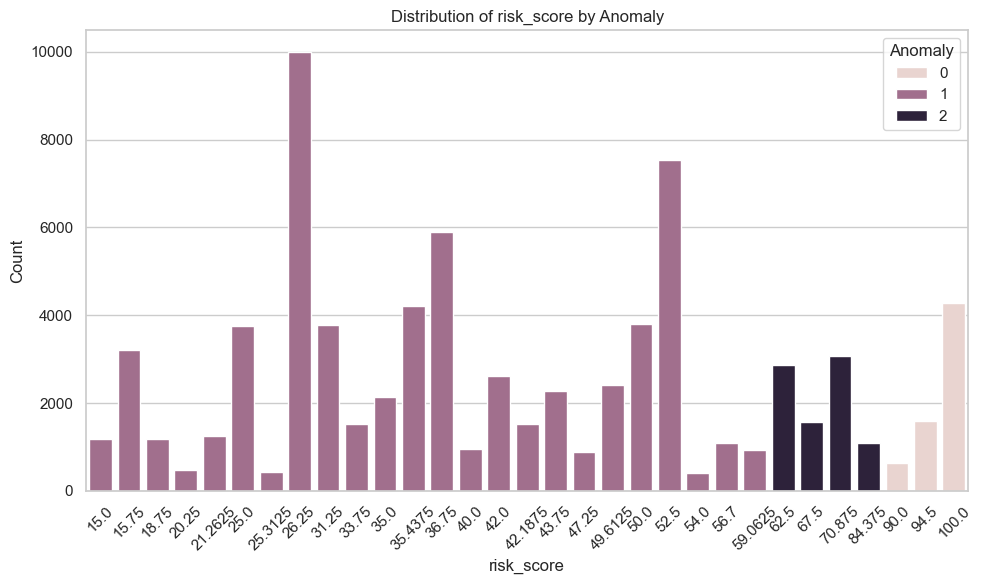

In [447]:
# distribuição de diferentes variáveis categóricas em relação à variável alvo 'anomaly' 

sns.set(style="whitegrid")

categorical_cols = ['hour_of_day', 'transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'risk_score']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='anomaly')
    plt.title(f'Distribution of {col} by Anomaly')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Anomaly', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

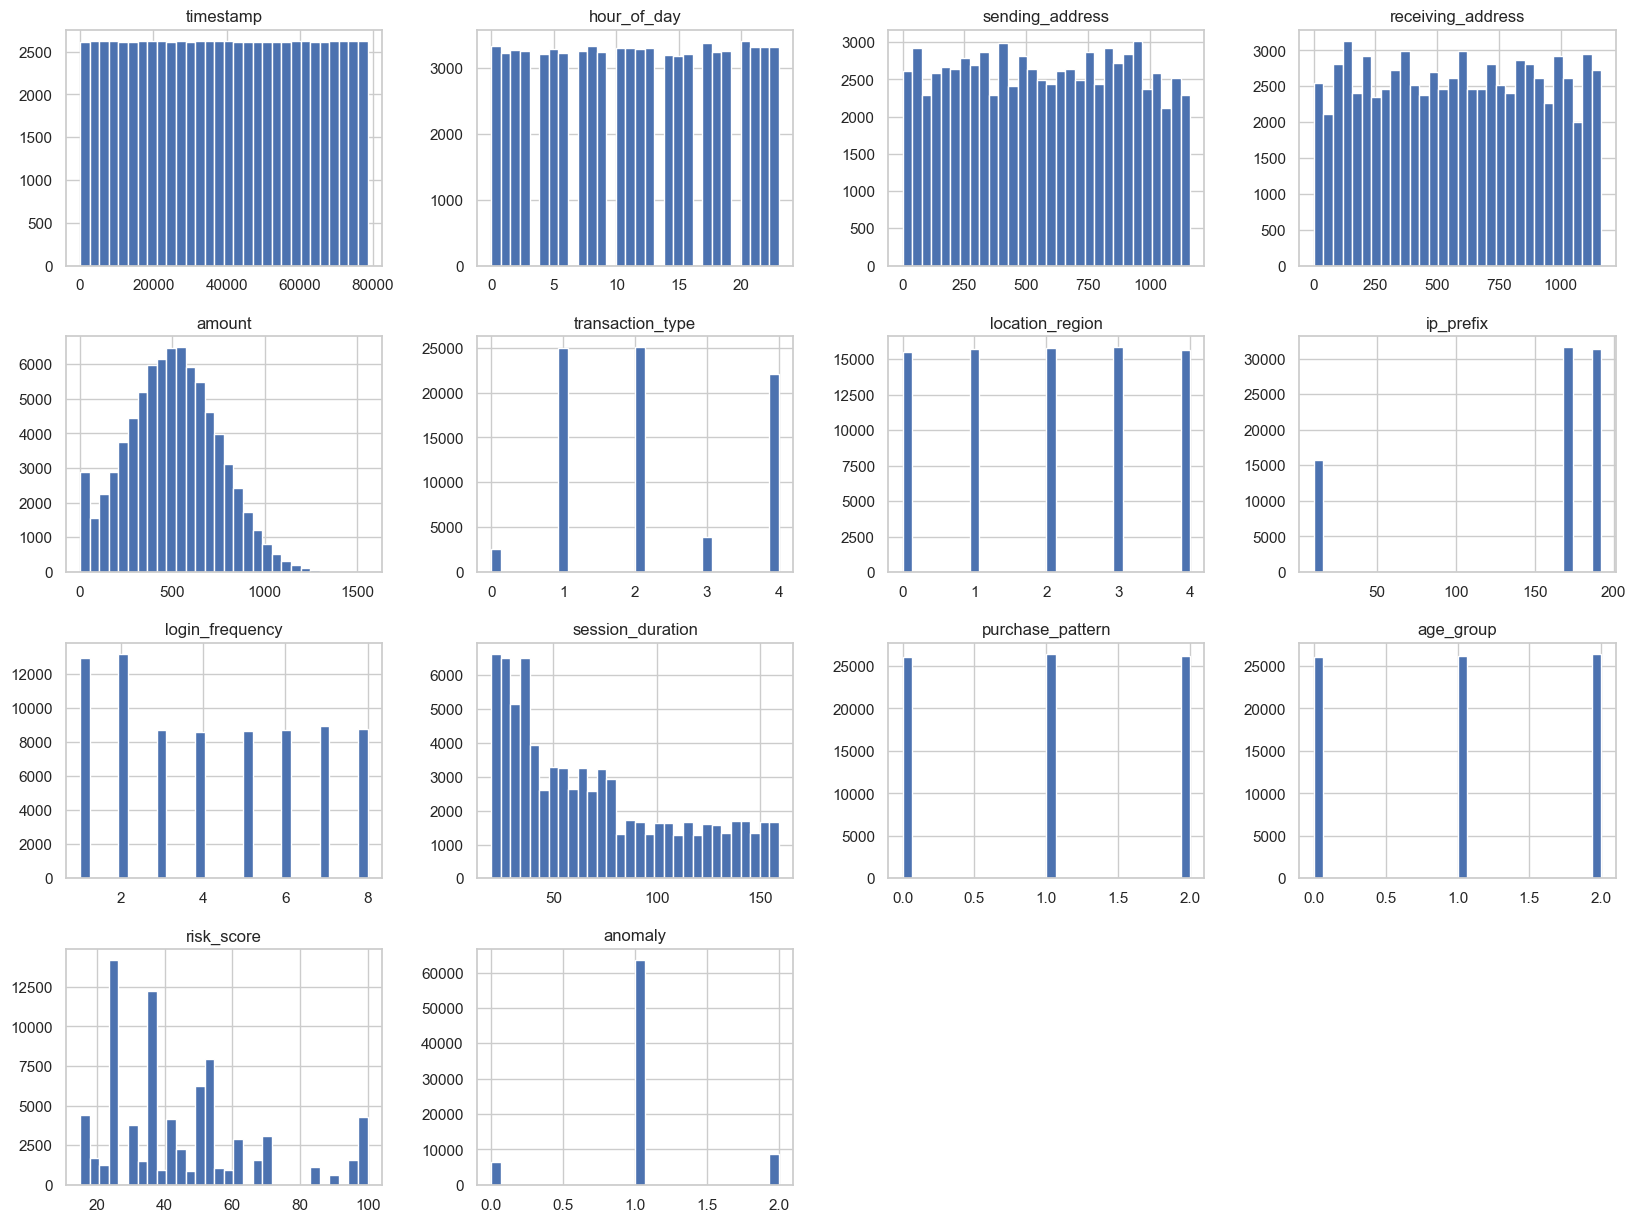

In [448]:
df.describe()

df.hist(bins=30, figsize=(20, 15))
plt.show()



From this analysis, we can observe key insights that enhance our understanding of the dataset and guide our modeling decisions. The variation in transaction amounts and session durations across different risk categories suggests these features are valuable predictors of anomaly. Additionally, the correlation heatmap highlights important relationships between features, such as the link between login frequency and session duration, which can inform our feature selection. Lastly, the encoding of categorical variables and their distribution analysis reveals patterns that could be crucial for predicting higher risk transactions. These findings lay a solid groundwork for our next steps in model development and anomaly detection.

### Feature extraction

### Create Feature: Hour Difference
Here we create a feature representing the absolute difference between the transaction hour and the average hour of all transactions.


In [449]:
mean_hour_of_day = df['hour_of_day'].mean()

df['hour_difference'] = (df['hour_of_day'] - mean_hour_of_day).abs()


### Create Binary Feature: Above Median Transaction Value
This feature indicates whether the transaction value is above the median value of all transactions.


In [450]:
threshold_amount = df['amount'].median()

df['is_above_median'] = (df['amount'] > threshold_amount).astype(int)


### Create Feature: Difference from Average Transaction Value by Type
This feature represents the difference between each transaction's value and the average value of transactions of the same type.


In [451]:
mean_amount_by_type = df.groupby('transaction_type')['amount'].transform('mean')

df['amount_diff_mean_by_type'] = df['amount'] - mean_amount_by_type


In [452]:

df['amount_difference'] = df['sending_address'] - df['receiving_address']

print(df.head())

features = df.drop(columns=['anomaly'])  
labels = df['anomaly']  


   timestamp  hour_of_day  sending_address  receiving_address      amount  \
0      21675           12              700                276  796.949206   
1      35368           19              960                369    0.010000   
2       3832           16              227                375  778.197390   
3      35500            9              664                629  300.838358   
4      10533           14              771                508  775.569344   

   transaction_type  location_region  ip_prefix  login_frequency  \
0                 4                2    192.000                3   
1                 1                4    172.000                5   
2                 1                1    192.168                3   
3                 4                4    172.000                8   
4                 2                0    172.160                6   

   session_duration  purchase_pattern  age_group  risk_score  anomaly  \
0                48                 0          0       

### Evaluate Features: Correlation Analysis
We perform a correlation analysis to understand the impact of our new features on the target variable.


In [453]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix


,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,hour_difference,is_above_median,amount_diff_mean_by_type,amount_difference
timestamp,1.000000,0.006184,-0.001232,-0.004398,0.001501,-1.026433e-03,-0.005037,0.000112,0.000656,0.002738,0.001698,0.001176,-0.003802,-0.000224,-0.000218,0.002095,1.443046e-03,0.002290
hour_of_day,0.006184,1.000000,0.001943,0.000784,0.000484,6.381585e-03,-0.000128,-0.003166,0.004483,0.006132,0.002270,0.006958,-0.190985,-0.166126,-0.002856,-0.005259,6.097836e-04,0.000818
sending_address,-0.001232,0.001943,1.000000,0.024324,-0.000349,3.802622e-03,-0.007378,-0.001767,-0.003314,-0.003484,-0.000074,-0.002841,-0.009497,-0.001545,-0.007803,0.002249,-3.763421e-04,0.694065
receiving_address,-0.004398,0.000784,0.024324,1.000000,0.001519,2.254950e-04,0.002753,-0.008348,-0.006475,-0.005034,0.004863,-0.001723,0.003097,-0.005804,-0.002516,-0.002029,1.578791e-03,-0.702817
amount,0.001501,0.000484,-0.000349,0.001519,1.000000,-7.261646e-03,0.001455,-0.001376,-0.000718,0.000355,0.000115,-0.000563,0.114075,0.133927,-0.005071,0.805884,9.999191e-01,-0.001342
transaction_type,-0.001026,0.006382,0.003803,0.000225,-0.007262,1.000000e+00,-0.003094,0.005268,0.132127,0.150555,0.099050,0.228829,-0.211055,0.015176,-0.000952,-0.005352,2.557068e-17,0.002543
location_region,-0.005037,-0.000128,-0.007378,0.002753,0.001455,-3.093660e-03,1.000000,-0.003407,0.001048,0.004056,0.003514,0.005600,0.004085,0.002964,0.004479,0.003003,1.444454e-03,-0.007233
ip_prefix,0.000112,-0.003166,-0.001767,-0.008348,-0.001376,5.268457e-03,-0.003407,1.000000,-0.000553,0.000959,0.000310,0.001143,0.004278,-0.005102,-0.004633,-0.003573,-1.266479e-03,0.004754
login_frequency,0.000656,0.004483,-0.003314,-0.006475,-0.000718,1.321266e-01,0.001048,-0.000553,1.000000,0.871915,-0.430310,0.522211,0.033010,0.486691,-0.001303,0.002215,-1.846921e-03,0.002305
session_duration,0.002738,0.006132,-0.003484,-0.005034,0.000355,1.505546e-01,0.004056,0.000959,0.871915,1.000000,-0.302653,0.607858,0.107844,0.471027,0.001045,0.002858,-4.302393e-05,0.001146


### Feature Selection: Identify Most Relevant Features
We use statistical techniques to select the most relevant features for predicting anomalies.


In [454]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
X = df[['hour_difference', 'is_above_median', 'amount_diff_mean_by_type']]
y = df['risk_score']  
selector.fit(X, y)
print("Feature scores:", selector.scores_)


Feature scores:

 [1164.87226101  554.98756308 1159.35787588]


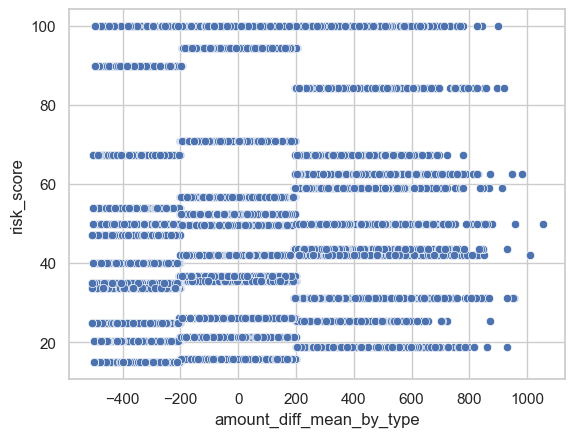

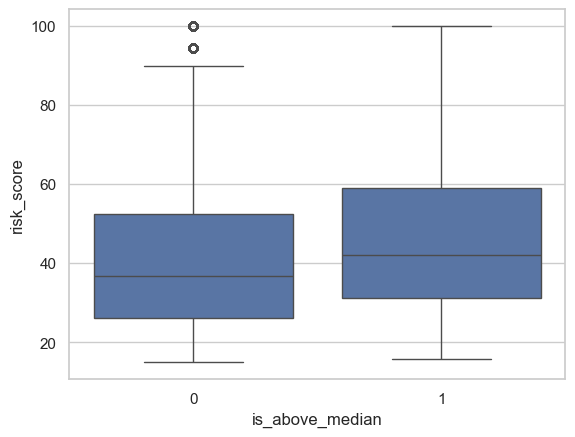

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='amount_diff_mean_by_type', y='risk_score', data=df)
plt.show()

sns.boxplot(x='is_above_median', y='risk_score', data=df)
plt.show()


## Prepare the dataframe for model training

### Split the dataset into train and test sets

In [456]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)
X_train, y_train = SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [457]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(anomaly
 1    0.333333
 2    0.333333
 0    0.333333
 Name: proportion, dtype: float64,
 anomaly
 1    0.805662
 2    0.111196
 0    0.083142
 Name: proportion, dtype: float64)

## Model training

### Select the best model
